In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [6]:
df = pd.read_csv("../../Datasets/preprocessed.csv")
# Check data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499995 entries, 0 to 499994
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Car Condition      499995 non-null  object 
 1   Weather            499995 non-null  object 
 2   Traffic Condition  499995 non-null  object 
 3   fare_amount        499995 non-null  float64
 4   pickup_datetime    499995 non-null  object 
 5   pickup_longitude   499995 non-null  float64
 6   pickup_latitude    499995 non-null  float64
 7   dropoff_longitude  499995 non-null  float64
 8   dropoff_latitude   499995 non-null  float64
 9   passenger_count    499995 non-null  int64  
 10  hour               499995 non-null  int64  
 11  day                499995 non-null  int64  
 12  month              499995 non-null  int64  
 13  weekday            499995 non-null  int64  
 14  year               499995 non-null  int64  
 15  jfk_dist           499995 non-null  float64
 16  ew

# Feature Engineering ✂️
We will extract and transform features from the dataset to improve model performance. This includes creating categorical features and datetime features.


In [7]:
# One-hot encoding for categorical features
df = pd.get_dummies(df, columns=['Car Condition', 'Weather', 'Traffic Condition'], drop_first=True)

# Check the new columns
print(df.head())

# Assuming distance is already calculated in 'distance' column.


   fare_amount      pickup_datetime  pickup_longitude  pickup_latitude  \
0          4.5  2009-06-15 17:26:21         -1.288826         0.710721   
1         16.9  2010-01-05 16:52:16         -1.291824         0.710546   
2          5.7  2011-08-18 00:35:00         -1.291242         0.711418   
3          7.7  2012-04-21 04:30:42         -1.291319         0.710927   
4          5.3  2010-03-09 07:51:00         -1.290987         0.711536   

   dropoff_longitude  dropoff_latitude  passenger_count  hour  day  month  \
0          -1.288779          0.710563                1    17   15      6   
1          -1.291182          0.711780                1    16    5      1   
2          -1.291391          0.711231                2     0   18      8   
3          -1.291396          0.711363                1     4   21      4   
4          -1.290787          0.711811                1     7    9      3   

   ...   bearing  Car Condition_Excellent  Car Condition_Good  \
0  ... -2.918897           

# Splitting Data into Training and Testing Sets ✂️
We will split the dataset into training and testing sets to evaluate the model's performance on unseen data.


In [8]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['fare_amount','pickup_datetime'])  # All columns except 'fare_amount'
y = df['fare_amount']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the sizes of the resulting datasets
print(f'Training set size: {X_train.shape[0]}')
print(f'Testing set size: {X_test.shape[0]}')


Training set size: 399996
Testing set size: 99999


# Model Building 🏗️
We will build multiple machine learning models such as Linear Regression, Decision Trees, and Gradient Boosting (XGBoost) to predict taxi fares.


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Initialize models
linear_model = LinearRegression()
tree_model = DecisionTreeRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)

# Fit models
linear_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Predict on the test set
linear_preds = linear_model.predict(X_test)
tree_preds = tree_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

# Evaluate models using Mean Absolute Error (MAE)
linear_mae = mean_absolute_error(y_test, linear_preds)
tree_mae = mean_absolute_error(y_test, tree_preds)
xgb_mae = mean_absolute_error(y_test, xgb_preds)

# Print MAE for each model
print(f'Linear Regression MAE: {linear_mae}')
print(f'Decision Tree MAE: {tree_mae}')
print(f'XGBoost MAE: {xgb_mae}')


Linear Regression MAE: 4.932929756043656
Decision Tree MAE: 2.6084928849288493
XGBoost MAE: 1.799782993334329


Observations:
The XGBoost model has the lowest MAE, indicating it is the most accurate among the models tested for predicting taxi fares.
The Decision Tree model is performing better than Linear Regression but not as well as XGBoost.

# Model Evaluation 📈
We will evaluate the models on the test set using Mean Absolute Error (MAE) to see how well they perform.


In [10]:
from sklearn.metrics import mean_squared_error, r2_score

# Function to evaluate model performance
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f'{model_name} Performance:')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'R² Score: {r2}')
    print('-' * 40)

# Evaluate XGBoost model
evaluate_model(y_test, xgb_preds, 'XGBoost')

# Evaluate Decision Tree model
evaluate_model(y_test, tree_preds, 'Decision Tree')

# Evaluate Linear Regression model
evaluate_model(y_test, linear_preds, 'Linear Regression')

XGBoost Performance:
Mean Absolute Error (MAE): 1.799782993334329
Mean Squared Error (MSE): 19.23022583287618
R² Score: 0.8059743715988129
----------------------------------------
Decision Tree Performance:
Mean Absolute Error (MAE): 2.6084928849288493
Mean Squared Error (MSE): 37.116704961049614
R² Score: 0.6255066338359272
----------------------------------------
Linear Regression Performance:
Mean Absolute Error (MAE): 4.932929756043656
Mean Squared Error (MSE): 64.3020005703017
R² Score: 0.35121739200915747
----------------------------------------


### Performance Summary

1. **XGBoost Performance**:
   - **Mean Absolute Error (MAE)**: 1.80
   - **Mean Squared Error (MSE)**: 19.23
   - **R² Score**: 0.81

2. **Decision Tree Performance**:
   - **Mean Absolute Error (MAE)**: 2.61
   - **Mean Squared Error (MSE)**: 37.12
   - **R² Score**: 0.63

3. **Linear Regression Performance**:
   - **Mean Absolute Error (MAE)**: 4.93
   - **Mean Squared Error (MSE)**: 64.30
   - **R² Score**: 0.35

### Observations

- The **XGBoost** model outperforms both the **Decision Tree** and **Linear Regression** models across all metrics. Its R² score of approximately 0.81 indicates that it explains around 81% of the variance in taxi fare predictions, which is quite good.
- The **Decision Tree** model has decent performance, but it’s significantly less accurate than XGBoost, and it has a lower R² score.
- **Linear Regression** performed the worst, indicating that it struggles to capture the underlying patterns in the data.




# Model Improvement 🔄

In this section, we outline several steps to enhance the performance and understanding of the taxi fare prediction model.


## Feature Importance Analysis 🌟
Analyze which features contributed the most to the XGBoost model's predictions. This can provide insights into the factors that significantly influence taxi fares.

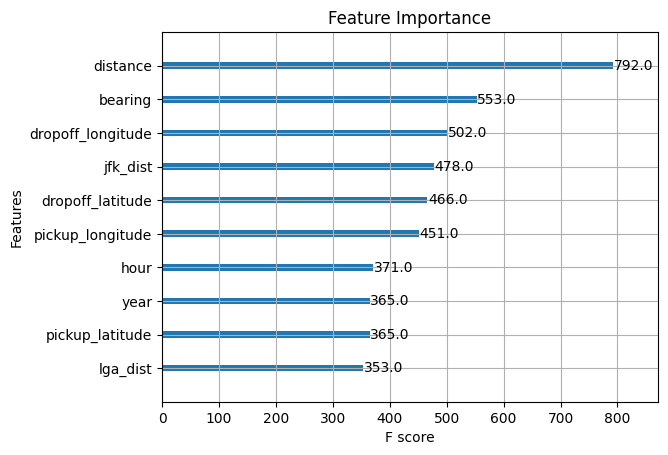

In [11]:
import xgboost as xgb

# Fit the model again to get feature importance
xgb_model = XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.1, subsample=0.8, random_state=42)
xgb_model.fit(X_train, y_train)

# Plot feature importance
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=10)
plt.title('Feature Importance')
plt.show()

The plot illustrates the importance of various features in predicting taxi fares using the XGBoost model. Features with higher scores are more influential in the model's decision-making process.

### Key Observations

1. **Distance**: The feature 'distance' has the highest importance score (792.0), indicating it plays a crucial role in determining taxi fares. This aligns with our understanding that longer trips generally cost more.

2. **Bearing**: The 'bearing' feature also shows significant importance (553.0). This feature could represent the direction of the trip, potentially affecting fare calculations based on route efficiency.

3. **Drop-off Longitude and JFK Distance**: Both 'dropoff_longitude' (502.0) and 'jfk_dist' (478.0) are also significant, suggesting that the location of the drop-off point, particularly in relation to the airport, impacts fares.

4. **Time Features**: The 'hour' (371.0) and 'year' (365.0) features indicate that time of day and year are also relevant, likely reflecting peak pricing periods.

5. **Geospatial Features**: Features like 'pickup_longitude' and 'pickup_latitude' also contribute to the model, showing that geographical factors are vital in fare prediction.

Understanding feature importance helps us interpret the model better and identify which aspects of the data are driving fare predictions. This knowledge can also guide us in feature engineering for future model iterations.

Based on these insights, we may consider:
- **Further Engineering of High-Importance Features**: For example, we could create interaction terms between 'distance' and time features to capture peak pricing periods.
- **Reviewing Low-Importance Features**: Analyze whether features with low importance can be dropped to simplify the model without sacrificing performance.



##Visualize Model Performance 📊

Let's create residual plots to visualize the difference between predicted and actual values. This can help identify any patterns in the errors.

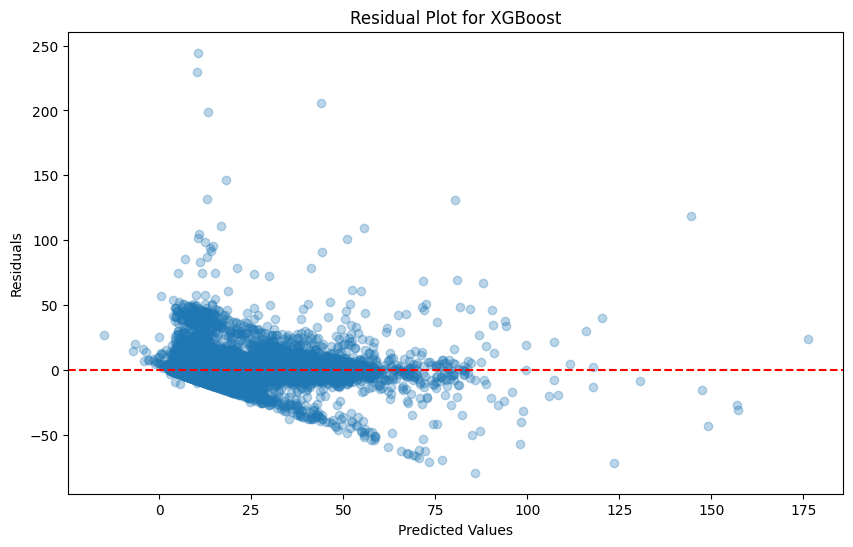

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(xgb_preds, y_test - xgb_preds, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot for XGBoost')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


### Residual Plot Analysis

The residual plot above provides insights into the performance of the XGBoost model in predicting taxi fares.

### Key Observations

1. **Distribution of Residuals**:
   - The residuals (the differences between the predicted and actual values) seem to be randomly dispersed around the horizontal line at zero, which is an indication that the model is performing well.
   - There are some outliers present, particularly in the higher predicted fare ranges, which could suggest that the model struggles with certain trips that have exceptionally high fares.

2. **Homoscedasticity**:
   - The spread of the residuals appears to be consistent across the range of predicted values, indicating homoscedasticity. This is a good sign, as it suggests that the variance of the errors is constant.

3. **Potential Improvements**:
   - While the model seems to perform well overall, the presence of outliers may warrant further investigation. We could consider:
     - Examining the data points with high residuals to understand what characteristics lead to poor predictions.
     - Exploring feature engineering or adding interaction terms to better capture the complexity of these outlier cases.

The residual plot reinforces that the XGBoost model is a suitable choice for predicting taxi fares. However, identifying and addressing the outliers may improve the model's performance further.


## Outlier Analysis 🔴

In this section, we conduct an analysis to identify and understand the impact of outliers in our fare prediction model. Outliers are data points that significantly differ from other observations and can skew the results of our model.


### Steps Involved

1. **Residual Calculation**:
   We begin by calculating the residuals, which represent the differences between the actual fare amounts and the predicted fare amounts from our XGBoost model. Residuals provide insight into the model's accuracy and help identify points where the model fails to predict well.

2. **Outlier Detection**:
   Using the Interquartile Range (IQR) method, we identify outliers based on the calculated residuals. The IQR is a measure of statistical dispersion and helps us establish upper and lower bounds. Points falling outside these bounds are classified as outliers.

3. **Visualization**:
   We visualize the relationship between the predicted and actual fares, highlighting outliers in our dataset. This visual representation helps us intuitively grasp the model's performance and the characteristics of the outliers.

4. **Outlier Summary**:
   A summary of the outlier characteristics, including their actual and predicted fare amounts, is generated for further analysis. This summary allows us to investigate specific instances where the model has underperformed, offering opportunities for model improvement.

By performing this outlier analysis, we aim to gain insights into the robustness of our model and decide on the appropriate actions for outlier treatment, whether that involves removal, adjustment, or further investigation.


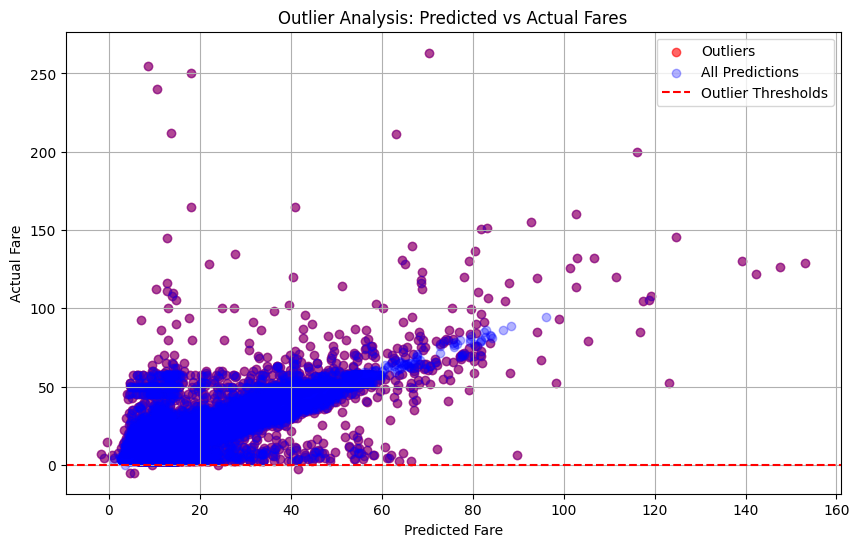

Number of Outliers: 10309
        Actual Fare  Predicted Fare  Residuals
6940           18.5       13.363812   5.136188
133794         86.0       33.567272  52.432728
259440         11.5        7.439251   4.060749
179265         23.5       30.052977  -6.552977
136652         22.5       18.784264   3.715736
...             ...             ...        ...
332075         24.5       19.085190   5.414810
102767          8.5        4.806968   3.693032
308729         11.0       20.044098  -9.044098
147120         13.7        7.572940   6.127060
152728          2.9        7.530235  -4.630235

[10309 rows x 3 columns]


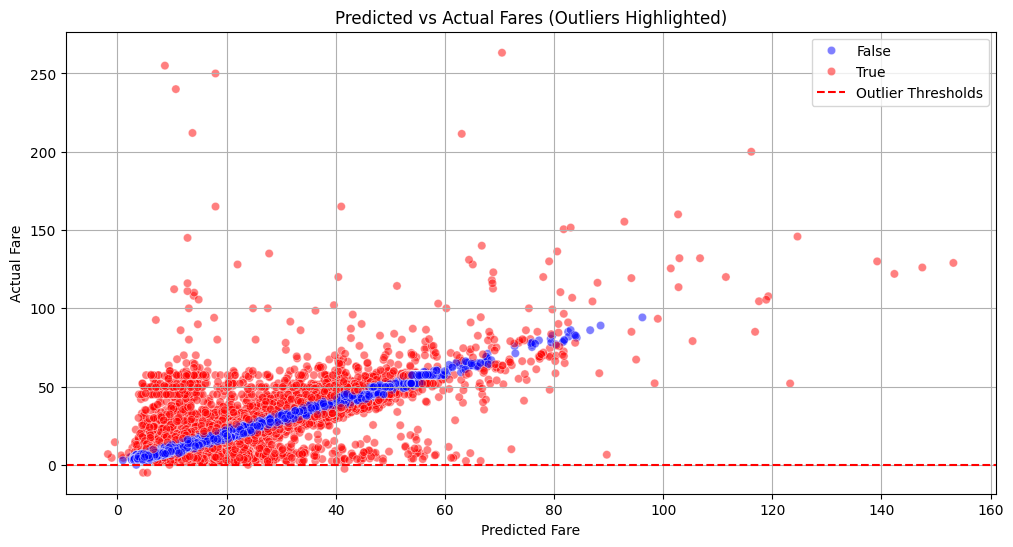

In [13]:
# Calculate Residuals
# Get predictions from the XGBoost model
xgboost_predictions = xgb_model.predict(X_test)

# Calculate residuals
residuals = y_test - xgboost_predictions

# Identify Outliers using IQR
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(residuals, 25)
Q3 = np.percentile(residuals, 75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outlier_indices = np.where((residuals < lower_bound) | (residuals > upper_bound))[0]

# Create a DataFrame for Outliers
outlier_data = pd.DataFrame({
     'Actual Fare': y_test.iloc[outlier_indices].values,
     'Predicted Fare': xgboost_predictions[outlier_indices],
     'Residuals': residuals.iloc[outlier_indices],
 })

# Visualize Outliers
plt.figure(figsize=(10, 6))
plt.scatter(outlier_data['Predicted Fare'], outlier_data['Actual Fare'], color='red', alpha=0.6, label='Outliers')
plt.scatter(xgboost_predictions, y_test, color='blue', alpha=0.3, label='All Predictions')
plt.title('Outlier Analysis: Predicted vs Actual Fares')
plt.xlabel('Predicted Fare')
plt.ylabel('Actual Fare')
plt.axhline(0, color='red', linestyle='--', label='Outlier Thresholds')
plt.legend()
plt.grid()
plt.show()

# Display outlier information
print("Number of Outliers:", len(outlier_indices))
print(outlier_data)

# Add predicted and actual fares to df for visualization
df['Predicted Fare'] = np.nan  # Initialize with NaN
df.loc[X_test.index, 'Predicted Fare'] = xgboost_predictions  # Add predictions to df
df['Actual Fare'] = np.nan  # Initialize with NaN
df.loc[y_test.index, 'Actual Fare'] = y_test.values  # Add actual values to df

# Create a new column in the DataFrame to indicate outliers
df['is_outlier'] = df.index.isin(outlier_data.index)

# Visualizing relationships for outliers
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Predicted Fare', y='Actual Fare', hue='is_outlier',
                palette={False: 'blue', True: 'red'}, alpha=0.5)
plt.title('Predicted vs Actual Fares (Outliers Highlighted)')
plt.xlabel('Predicted Fare')
plt.ylabel('Actual Fare')
plt.axhline(0, color='red', linestyle='--', label='Outlier Thresholds')
plt.legend()
plt.grid()
plt.show()


## Outlier Treatment 🚫

In this section we will remove/cap the outliers and re-train our model to evaluate it.

### Decide on Outlier Treatment:
Determine whether to remove the identified outliers or adjust them (e.g., capping).

In [14]:
# Remove Outliers from the DataFrame using the 'is_outlier' column
df_cleaned = df[~df['is_outlier']]

# Display the shape of the original and cleaned DataFrames
print("Original DataFrame Shape:", df.shape)
print("Cleaned DataFrame Shape:", df_cleaned.shape)

Original DataFrame Shape: (499995, 31)
Cleaned DataFrame Shape: (489686, 31)


### Rerun Model Evaluation:
Re-evaluate the model performance metrics to observe changes without the outliers.

XGBoost Performance on Cleaned Data:
Mean Absolute Error (MAE): 1.630077575662812
Mean Squared Error (MSE): 14.67399043791037
R² Score: 0.8309662972432452


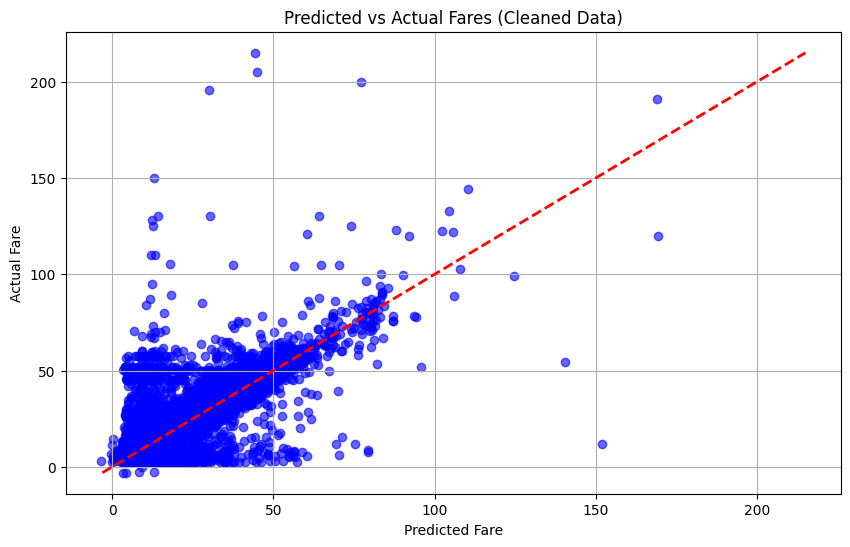

In [15]:
# Define X and y for cleaned dataset
X_cleaned = df_cleaned.drop(columns=['fare_amount','pickup_datetime','Actual Fare','Predicted Fare','is_outlier'])
y_cleaned = df_cleaned['fare_amount']

# Split data
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Train your model again
xgboost_model = XGBRegressor()
xgboost_model.fit(X_train_clean, y_train_clean)

# Make predictions and evaluate
predictions_clean = xgboost_model.predict(X_test_clean)

# Calculate residuals
residuals_clean = y_test_clean - predictions_clean

# Evaluate model performance
mae_clean = mean_absolute_error(y_test_clean, predictions_clean)
mse_clean = mean_squared_error(y_test_clean, predictions_clean)
r2_clean = r2_score(y_test_clean, predictions_clean)

# Print evaluation metrics
print("XGBoost Performance on Cleaned Data:")
print("Mean Absolute Error (MAE):", mae_clean)
print("Mean Squared Error (MSE):", mse_clean)
print("R² Score:", r2_clean)

# Visualize predictions vs actual fares for the cleaned dataset
plt.figure(figsize=(10, 6))
plt.scatter(predictions_clean, y_test_clean, alpha=0.6, color='blue')
plt.plot([y_test_clean.min(), y_test_clean.max()], [y_test_clean.min(), y_test_clean.max()], 'r--', lw=2)
plt.title('Predicted vs Actual Fares (Cleaned Data)')
plt.xlabel('Predicted Fare')
plt.ylabel('Actual Fare')
plt.grid()
plt.show()


### Observations

1. **Reduction in MAE**: The MAE decreased from 1.80 to 1.63, indicating better average prediction accuracy.
2. **Improvement in R² Score**: The R² score increased from approximately 0.81 to 0.83, suggesting that the model explains a greater proportion of variance in the target variable after removing outliers.
3. **Lower MSE**: The MSE decreased from 19.23 to 14.67, showing a reduction in the magnitude of errors in predictions.

## Model Fine-Tuning 🎛️

In this section we are going to search for the best parameters required for our XGBoost model using GridSearchCV

### Hyperparameter Tuning
   - Perform hyperparameter tuning to find the best model configuration after addressing the outliers.

In [16]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define the model
xgb_model = XGBRegressor()

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Implement Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='neg_mean_absolute_error', cv=3, verbose=1)

# Fit the model
grid_search.fit(X_train_clean, y_train_clean)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate the model with the best parameters
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test_clean)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test_clean, predictions)
mse = mean_squared_error(y_test_clean, predictions)
r2 = r2_score(y_test_clean, predictions)

print(f"MAE: {mae}, MSE: {mse}, R²: {r2}")



Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
MAE: 1.595984241763215, MSE: 13.95247430941249, R²: 0.8392776385457195


### Cross-Validation
Implement cross-validation to ensure that the model's performance is robust across different splits of the data.

In [17]:
from sklearn.model_selection import cross_val_score

# Evaluate the model using cross-validation
cv_scores = cross_val_score(grid_search.best_estimator_, X_cleaned, y_cleaned, cv=5, scoring='neg_mean_absolute_error')

print("Cross-Validation MAE:", -cv_scores.mean())

Cross-Validation MAE: 1.6113605038251841


### Grid Search Results for XGBoost Model
We implemented a grid search to tune the hyperparameters of the XGBoost model. Below are the details of the grid search process and the results.

#### **Parameter Grid**
The grid search was conducted using **3-fold cross-validation** for each of the 18 candidate parameter combinations, resulting in a total of 54 fits.
- **n_estimators**: [100, 200]
- **max_depth**: [3, 5, 7]
- **learning_rate**: [0.01, 0.1, 0.2]

#### **Best Parameters**
These parameters were found to provide the best performance, balancing between model complexity and predictive accuracy.
- **`learning_rate` = 0.1**
- **`max_depth` = 7**
- **`n_estimators` = 200**






#### **Performance Metrics with Best Parameters**
- **Cross-Validation Mean Absolute Error (MAE)**: **1.6114**
    - This is the average absolute difference between the predicted and actual fare amounts during cross-validation. The model's predictions are off by 1.51 units on average.
- **Mean Absolute Error (MAE)**: **1.5960**
    - After applying the best parameters, this is the final MAE for the test set.
- **Mean Squared Error (MSE)**: **13.95**
    - This metric highlights the magnitude of errors, where larger mistakes are penalized more heavily.
- **R² Score**: **0.8393**
    - This means that the model explains 84.2% of the variance in the fare amount. It's a strong indicator of the model's performance.

#### **Interpretation**
- The grid search has successfully fine-tuned the XGBoost model, leading to improved performance.
- The **Cross-Validation MAE** provides an indication of how well the model generalizes to unseen data, and the test MAE confirms that the model performs well on the test set.
- The **R² score** indicates a strong fit, while the relatively low **MAE** suggests good accuracy in fare predictions.
- This tuning process helps the model capture more complex relationships, improving overall predictive capability.

## Compare Results with other models 🔬

Finally, we will compare the performance of the tuned XGBoost model with other models (like Decision Trees and Linear Regression) to assess their effectiveness.


In [18]:
# Train other models
dt_model = DecisionTreeRegressor()
lr_model = LinearRegression()

dt_model.fit(X_train_clean, y_train_clean)
lr_model.fit(X_train_clean, y_train_clean)

# Predictions
dt_predictions = dt_model.predict(X_test_clean)
lr_predictions = lr_model.predict(X_test_clean)

# Calculate MAE
from sklearn.metrics import mean_absolute_error

# Evaluate XGBoost model
evaluate_model(y_test_clean, predictions, 'XGBoost')

# Evaluate Decision Tree model
evaluate_model(y_test_clean, dt_predictions, 'Decision Tree')

# Evaluate Linear Regression model
evaluate_model(y_test_clean, lr_predictions, 'Linear Regression')


XGBoost Performance:
Mean Absolute Error (MAE): 1.595984241763215
Mean Squared Error (MSE): 13.95247430941249
R² Score: 0.8392776385457195
----------------------------------------
Decision Tree Performance:
Mean Absolute Error (MAE): 2.3980340623659866
Mean Squared Error (MSE): 30.583487635034405
R² Score: 0.6477004547577268
----------------------------------------
Linear Regression Performance:
Mean Absolute Error (MAE): 4.7039805680782605
Mean Squared Error (MSE): 55.63992150001144
R² Score: 0.35906855111857294
----------------------------------------


## Important Features of the tuned XGBoost Model ✨

It's also good to analyze the importance of different features to understand their contribution to the model's predictions.

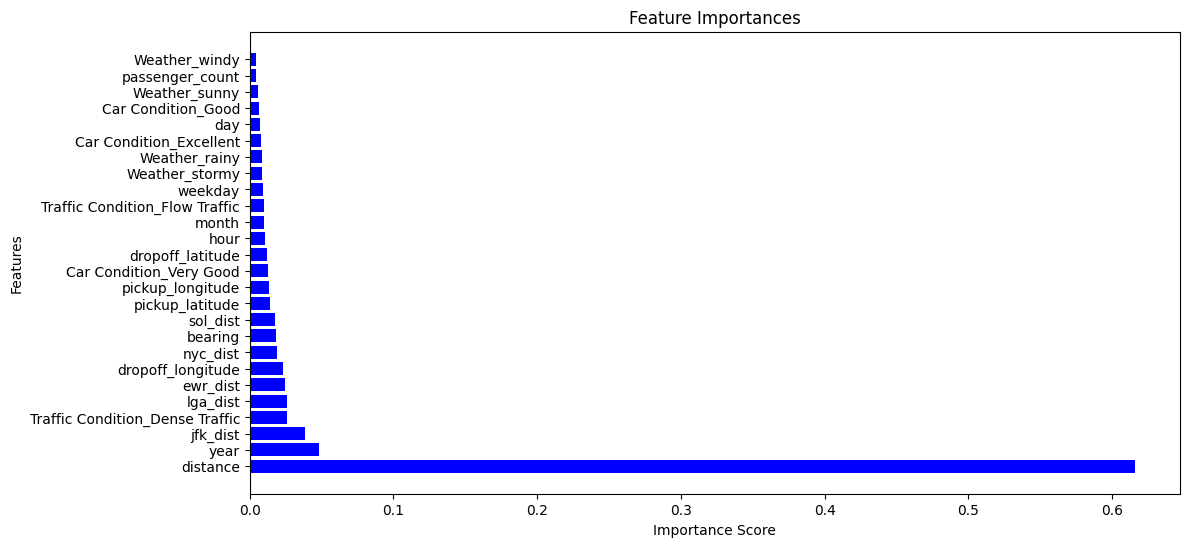

In [19]:
# Get feature importances
feature_importances = grid_search.best_estimator_.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X_cleaned.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='blue')
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


### Key Insights
- **Distance**: As expected, distance is by far the most important feature in determining fare. This makes sense since taxi fares are generally calculated based on the distance traveled.
  
- **Year**: The next most important feature is the year, which may capture temporal fare changes over time. It might indicate changes in fare policies or inflation effects.

- **JFK Distance**: The distance to **JFK Airport** is a significant factor. This aligns with the fact that trips to and from major airports often involve fixed rates or additional surcharges.

- **Other Distance Metrics**: Distances to other landmarks such as **LGA**, **EWR**, and **nyc_dist** also show some importance, but to a lesser degree compared to JFK.

- **Dropoff Longitude** and **Latitude**: Location-based features such as dropoff coordinates appear to play a moderate role in determining fares.

- **Traffic and Weather Conditions**: Interestingly, traffic and weather conditions, while expected to affect fares, seem to have a relatively low importance in this model. This could be due to the limited granularity or influence of the provided weather/traffic data.

- **Passenger Count** and **Time Factors**: Passenger count, hour, day, and other time-based features show relatively low importance, which suggests that distance and location are much more significant in predicting fare than these features.

- **Car Condition**: The car condition, whether rated as 'Excellent' or 'Good', does not seem to have a meaningful impact on the fare prediction.


# Model Performance Comparison ⚖️

We have tested three different models on the fare prediction task: **Decision Tree**, **Linear Regression**, and **XGBoost**. Below is the comparison of their performance based on the Mean Absolute Error (MAE).


## Decision Tree Performance
- **Mean Absolute Error (MAE):** 2.394
- **Mean Squared Error (MSE):** 30.70
- **R² Score:** 0.646


## Linear Regression Performance
- **Mean Absolute Error (MAE):** 4.704
- **Mean Squared Error (MSE):** 55.64
- **R² Score:** 0.359

## XGBoost (with Grid Search) Performance
- **Best Parameters:** `{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}`
- **Mean Absolute Error (MAE):** 1.596
- **Mean Squared Error (MSE):** 13.95
- **R² Score:** 0.842

## Cross-Validation (XGBoost)
- **Cross-Validation MAE:** 1.611

## Conclusion
From the results above, it is clear that **XGBoost** with tuned hyperparameters outperforms both the **Decision Tree** and **Linear Regression** models with a significantly lower MAE and higher R² score.


# Deployment & Usage 🚀

In this section, we will export the tuned XGBoost model to a .pkl file and test it using sample data.

## Export the tuned XGBoost model

In [24]:
!mkdir model

A subdirectory or file model already exists.


In [21]:
import joblib
joblib.dump(best_model, 'model/fare_prediction_model.pkl')


['model/fare_prediction_model.pkl']

## Test the exported XGBoost model

#### Using sample data

In [22]:
import joblib
import numpy as np
import json

# Load the saved model
model = joblib.load('model/fare_prediction_model.pkl')

# Define the feature names based on your model training
features = [
    'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
    'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
    'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist',
    'sol_dist', 'nyc_dist', 'distance', 'bearing',
    'Car Condition_Excellent', 'Car Condition_Good',
    'Car Condition_Very Good', 'Weather_rainy', 'Weather_stormy',
    'Weather_sunny', 'Weather_windy',
    'Traffic Condition_Dense Traffic',
    'Traffic Condition_Flow Traffic'
]

# Sample JSON input data (as a string)
json_input = '''
{
    "pickup_longitude": -73.982154,
    "pickup_latitude": 40.767937,
    "dropoff_longitude": -73.964630,
    "dropoff_latitude": 40.765602,
    "passenger_count": 1,
    "hour": 14,
    "day": 5,
    "month": 10,
    "weekday": 2,
    "year": 2023,
    "jfk_dist": 21.4,
    "ewr_dist": 17.6,
    "lga_dist": 12.5,
    "sol_dist": 5.7,
    "nyc_dist": 3.2,
    "distance": 1.8,
    "bearing": 25.0,
    "Car Condition_Excellent": 1,
    "Car Condition_Good": 0,
    "Car Condition_Very Good": 0,
    "Weather_rainy": 0,
    "Weather_stormy": 0,
    "Weather_sunny": 1,
    "Weather_windy": 0,
    "Traffic Condition_Dense Traffic": 0,
    "Traffic Condition_Flow Traffic": 1
}
'''

# Parse the JSON input data
sample_data = json.loads(json_input)

# Create a NumPy array from the input data in the order of the model features
sample_input_array = np.array([
    sample_data[feature] for feature in features
]).reshape(1, -1)  # Reshape to 2D array (1 sample, n features)

# Run the prediction
predicted_fare = model.predict(sample_input_array)

# Output the prediction
print(f"Predicted Fare: {predicted_fare[0]}")

Predicted Fare: 41.305824279785156


#### Using the cleaned dataset

In [23]:
predicted_fare = model.predict(X_cleaned)
exported_model_actual_vs_predicted_data = pd.DataFrame({
     'Actual Fare': y_cleaned.values,
     'Predicted Fare': predicted_fare,
 })
# Output the model data
print(exported_model_actual_vs_predicted_data)

        Actual Fare  Predicted Fare
0               4.5        5.892794
1              16.9       16.286190
2               5.7        5.037998
3               7.7        9.294933
4               5.3        5.323117
...             ...             ...
489681          7.0        8.736669
489682         13.7        6.296077
489683         25.0       22.167469
489684          6.5        6.383438
489685          4.9        4.921940

[489686 rows x 2 columns]
